# Time Series Analysis with R - Chapter 1

## This notebook is a walkthrough of *Introductory Time Series with R* by Paul S.P. Cowpertwait and Andrew V. Metcalf (Springer, 2009). We will explore the examples presented in the text with comments about each, providing a high-level overview of the concepts presented. This notebook will also contain *some* of the problems presented at the end of each chapter, though may not include solutions.

## Enjoy!

### Cal Johnson
#### Analytics Engineer
#### AO AAE, USCC

## Chapter 1 - Time Series Data

*Time series anlysis* attempts to quantify main features of a data set and its stochastic variation.

Following along with the book, we see the classic example of a function that calculates factorials recursively, implemented, as with everything in this book and notebook, in *R*:

In [12]:
fact <- function(n) if (n==1) 1 else n * fact(n-1)

And to test in the case that we wish to know what 11! is:

In [13]:
c(fact(11), "Booyah!")

[1] "39916800" "Booyah!"

Data in R are stored in objects, which is useful to us as the language provides an extensive number of methods to work with, and manipulate, these data objects. In the below example, we will load the AirPassengers data set using data(), and save this data set to the variable AP. Once this is done, we will ask R to tell us the class of the AP object to verify that is is a time series ("ts") data set with class(), and then we'll have a look at the data set.

In [14]:
data(AirPassengers)  # load the data set
AP <- AirPassengers  # save data set to variable
class(AP)  # see what class AP is
AP # Have a look at the data set

[1] "ts"

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

Since this is a time series, or ts, class object, we have some useful methods available to us. A few examples are the start(), end(), and frequency() methods:

In [15]:
start(AP); end(AP); frequency(AP)


[1] 1949    1

[1] 1960   12

[1] 12

We now know that this time series begins in January of 1949, ends in Decmber of 1960, and each record apears in monthly intervals.

One of the first tests to employ with any time series analysis is that of the *Interoccular Trauma Examination*, or simply *looking* at a plot of the data:

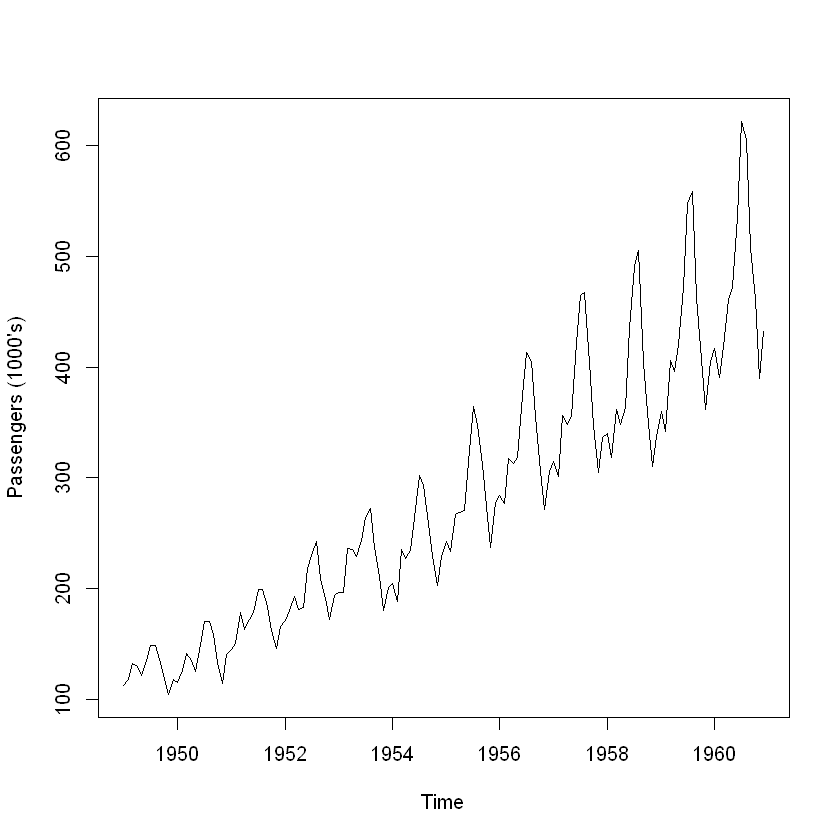

In [16]:
plot(AP, ylab = "Passengers (1000's)")

A few things to note about this plot:

+ The number of passengers on the airline is going up
+ There appears to be a pattern within each year

The first observation, a systematic change in a time series that doesn't seem periodic is called a *trend*. The second is a *seasonal variation* and is a pattern that repeats within a fixed period (hence it seems periodic). This seasonal variation may be removed by aggregating the data to a different level. Here we aggregate to the annual level to remove the periodic observation with the aggregate() function:

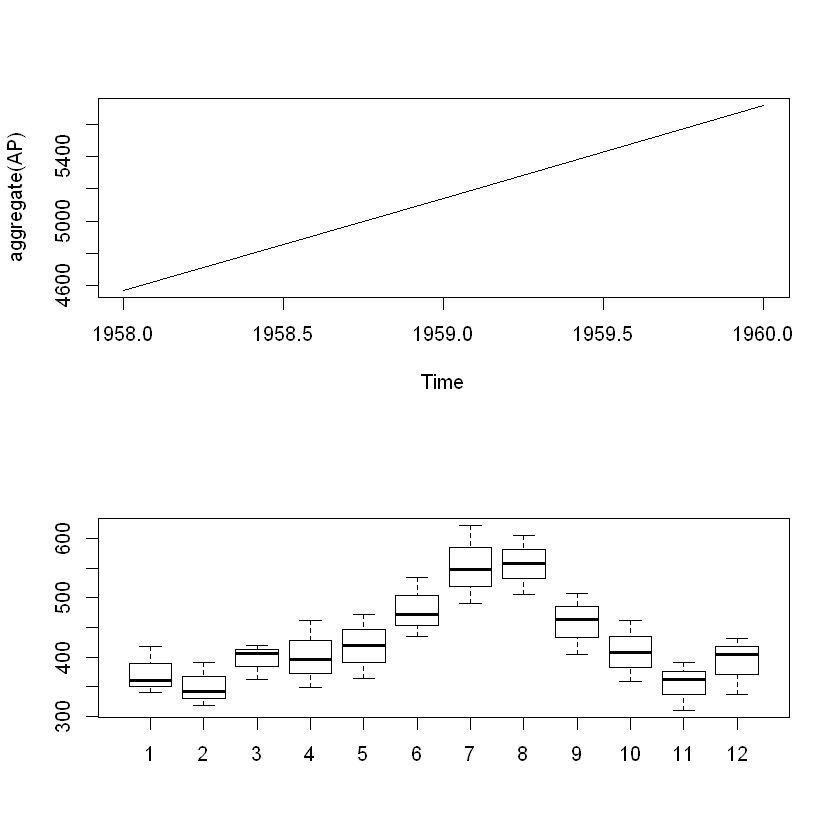

In [40]:
layout(1:2) # about to produce two graphics in one window, vector/matrix input for layout
plot(aggregate(AP))  # show the time series aggregated to the annual level
boxplot(AP ~ cycle(AP))  # summarize values of each season with boxplot, use cycle function to extract the seasons from each item of data

We can see the growing trend in the top plot, and the seasonal effects in the boxplot.

When performing a time series analysis, you should know how the data was collected and their unit of measurement. Knowing this allows you to do more with your analysis. Take the unemployment dat for Maine, below:

In [18]:
www <- "Maine.dat"  # assign the data file to variable www
Maine.month <- read.table(www, header = TRUE)  # read in the data file, knowing the first row is header info

attach(Maine.month)  # attach to R search path for variables here can be accessed by their names
class(Maine.month)  # should see data frame instead of ts

[1] "data.frame"

In [19]:
Maine.month.ts <- ts(unemploy, start = c(1996,1), frequency = 12)  # convert unemploy vairable to ts

Note that this uses all the data, but we could be more selctive by choosing a different start date and even using the the *end* parameter.

In [20]:
Maine.annual.ts <- aggregate(Maine.month.ts)/12  # mean annual rate

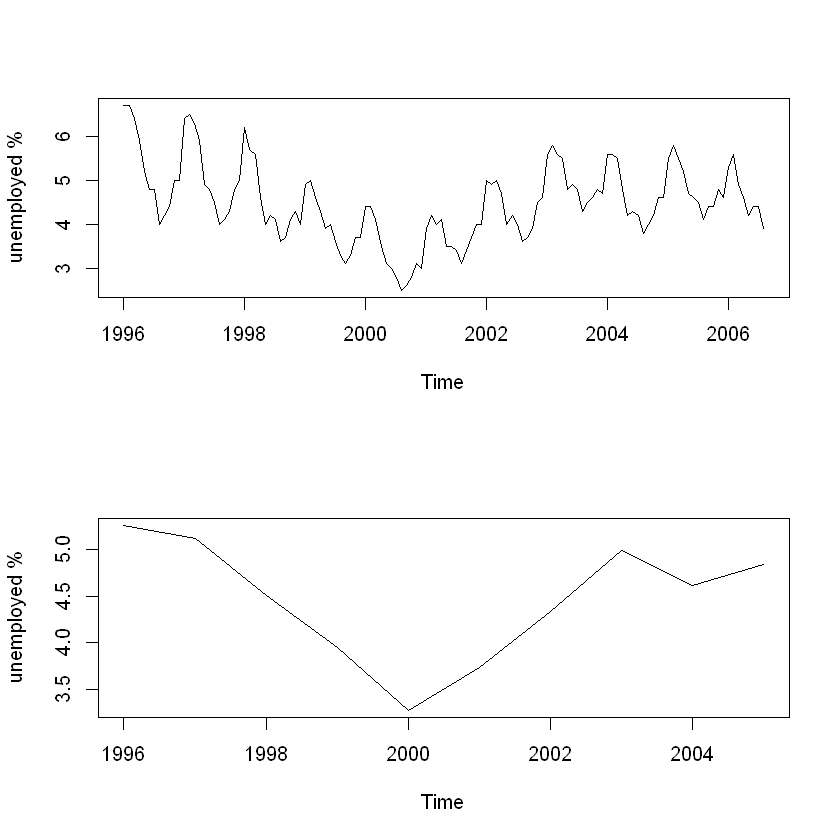

In [21]:
layout(1:2)
plot(Maine.month.ts, ylab = "unemployed %")
plot(Maine.annual.ts, ylab = "unemployed %")

Plotting at these two levels clearly indicates there is a monthly variation, and we can calculate the percentage of a specific month using the window() function:

In [22]:
Maine.Feb <- window(Maine.month.ts, start = c(1996,2), freq = TRUE)  # values for February
Maine.Aug <- window(Maine.month.ts, start = c(1996,8), freq = TRUE)  # values for August

Feb.ratio <- mean(Maine.Feb)/mean(Maine.month.ts)  # ratio for February
Aug.ratio <- mean(Maine.Aug)/mean(Maine.month.ts)  # ratio for August

Feb.ratio
Aug.ratio

[1] 1.222529

[1] 0.8163732

These values allow us to begin a deper dive inot possible contributors to this variation, noting that unemployment is about 22% higher in February and about 18% lower in August. It is important to consider these different ways to view time series data, as samping only in August, versus the yearly averages, we would have underestimated unemployment by a factor of 0.816.

A good analyst may want to keep asking questions, and rightfully so, it is the nature of an analyst! Now that we have the unemployment information for Maine, what does the nation's unemployment look like? Are there similar trends? Is what is happening in Maine reflected on a national scale? Let's review some calls in R for the US unemployment:

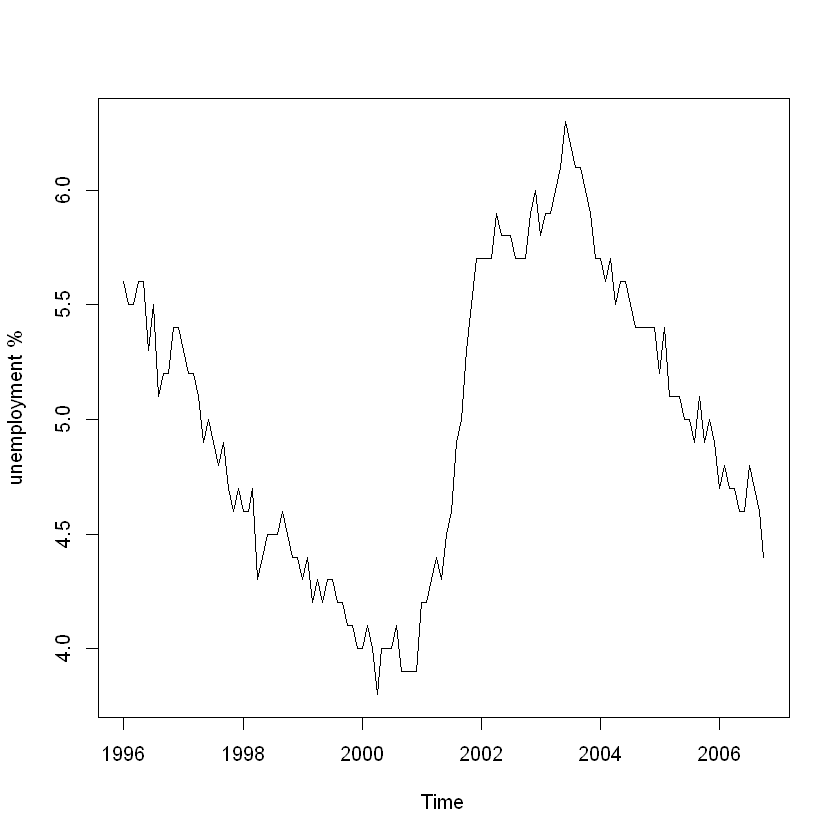

In [23]:
www <- "USunemp.dat"
US.month <- read.table(www, header = TRUE)
attach(US.month)
US.month.ts <- ts(USun, start = c(1996,1), end = c(2006, 10), freq = 12)
plot(US.month.ts, ylab = "unemployment %")

We now look at multiple time series from Australia's chocolate (tonnes), beer (Ml) and electricity (kWh) monthly supply from January 1958 to December 1990.

In [24]:
www <- "cbe.dat"
CBE <- read.table(www, header = TRUE)
class(CBE)
head(CBE)

[1] "data.frame"

choc,beer,elec
1451,96.3,1497
2037,84.4,1463
2477,91.2,1648
2785,81.9,1595
2994,80.5,1777
2681,70.4,1824


Now that the data is available for us in a data frame, we will make a time series object from it, remembering that using the end parameter means R will use all the data in the vector, and leaving out the month in start forces R to assume the default value of 1.  To visualize the data, we can use cbind() within plot to see them all at once.

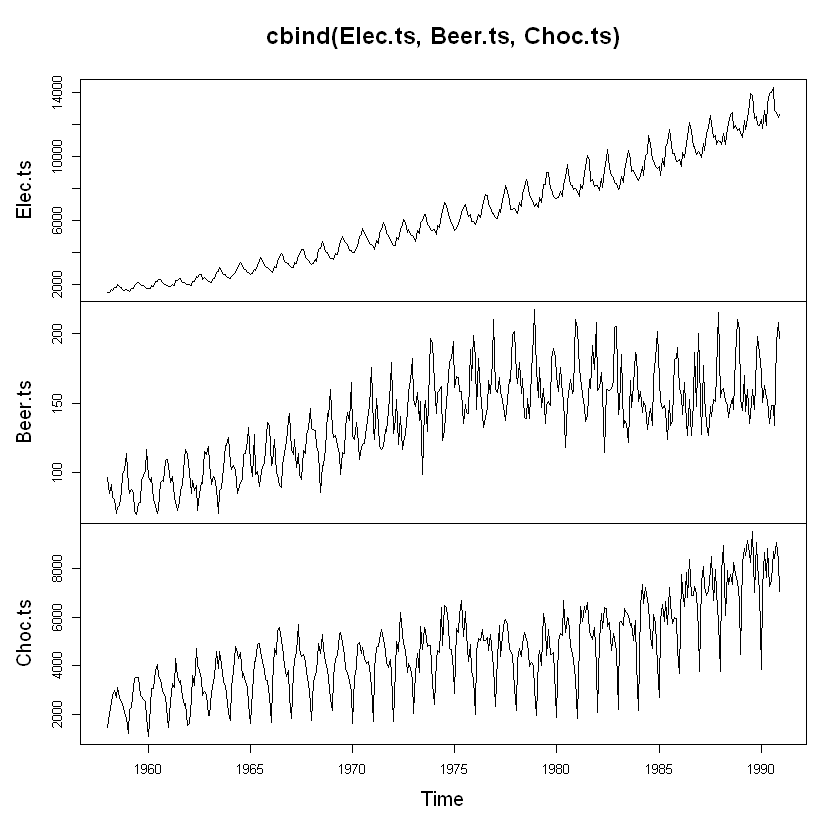

In [25]:
Elec.ts <- ts(CBE[,3], start = 1958, freq = 12)
Beer.ts <- ts(CBE[,2], start = 1958, freq = 12)
Choc.ts <- ts(CBE[,1], start = 1958, freq = 12)
plot(cbind(Elec.ts,Beer.ts,Choc.ts))

R also has some handy tools for dealing with multiple time series, and we will use one, ts.intersect, to see explore a pitfall of analysing multiple time series. We will look at the intersetion between the air passenger data and the electricity data:

In [26]:
AP.elec <- ts.intersect(AP, Elec.ts)  # get intersection between the two series
start(AP.elec)  # checking numbers with text book
start(AP.elec)  # checking numbers with text book
head(AP.elec)  # checking numbers with text book

[1] 1958    1

[1] 1958    1

AP,Elec.ts
340,1497
318,1463
362,1648
348,1595
363,1777
435,1824


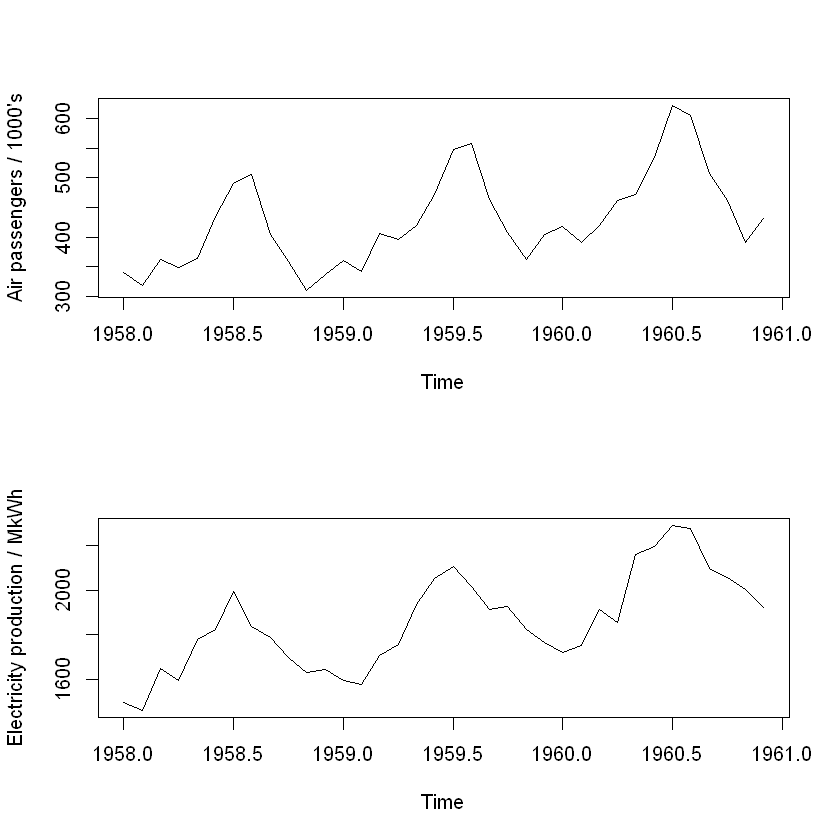

In [27]:
# Now plotting
AP <- AP.elec[,1]
Elec <- AP.elec[,2]

layout(1:2)
plot(AP, main = "", ylab = "Air passengers / 1000's")
plot(Elec, main = "", ylab = "Electricity production / MkWh")

[1] "Correlation coefficient: 0.884167"

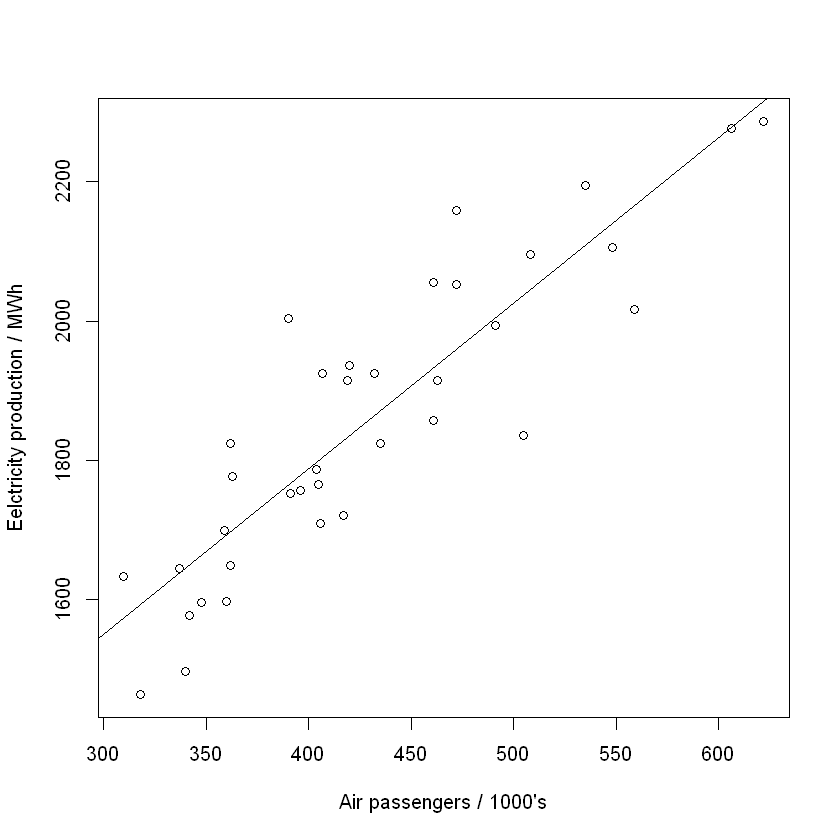

In [28]:
plot(as.vector(AP), as.vector(Elec),  # to convert the ts object to a vector for scatter plot
    xlab = "Air passengers / 1000's",
    ylab = "Eelctricity production / MWh")
abline(reg = lm(Elec ~ AP))  # linear regression line in plot
corr.coeff <- cor(AP,Elec)
sprintf("Correlation coefficient: %f", corr.coeff)  # print out the correlation coefficient

Notice that, by the correlation coefficient the two time series are highly correlated. However, we are reminded of a rule in statistics: correlation does not imply causation. For this plot, it is not plausible that grwoing numbers of US air passengers is causing, nor caused by, growing production of electricity in Australia.

Now we shift focus to a brief look at financial data, which can sometimes offer us a dramatic change that can be explained by some major event, while day-to-day variations are caused by complex reasons that are impossible to isolate.

The data we will explore here will be exchange rates for the British pounds sterling and the New Zealand dollar from January 1991 to March 2000. This data are mean values taken over quarterly periods of three months, with Q1 being from January to March. Let's read them in and make them into a time series object.

In [29]:
www <- "pounds_nz.dat"
Z <- read.table(www, header = TRUE)
head(Z)

xrate
2.9243
2.9422
3.1719
3.2542
3.3479
3.5066


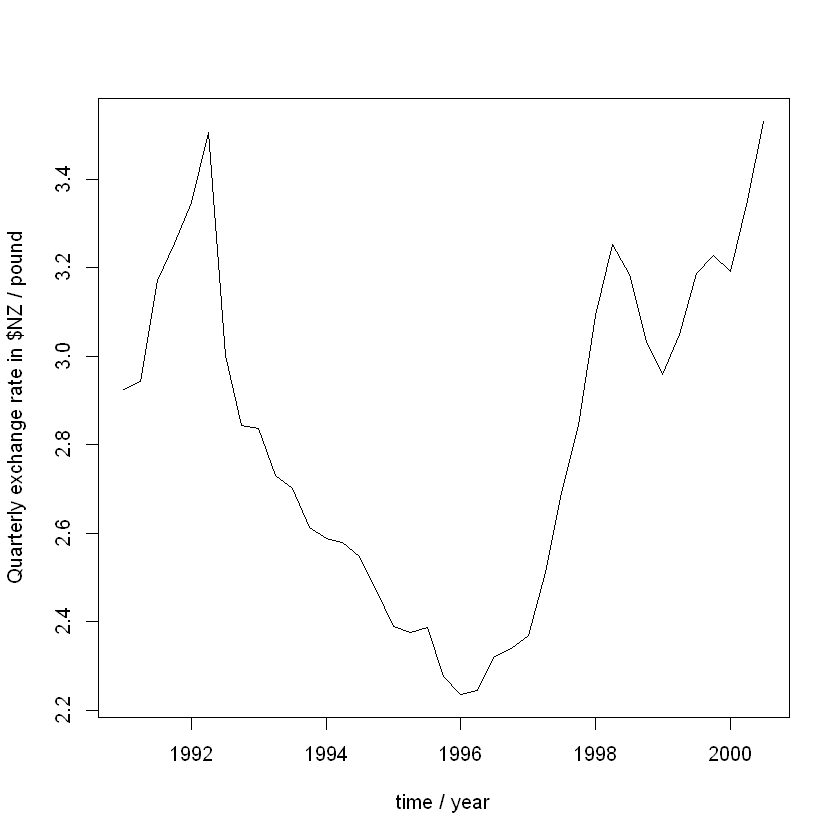

In [30]:
Z.ts <- ts(Z, st = 1991, fr = 4)
plot(Z.ts, xlab = "time / year",
     ylab = "Quarterly exchange rate in $NZ / pound")

As with most financial data, the trends here tend to change direction at unpredicatable times, and are, therefore, called *stochastic trends*, rather than the *deterministic trends* as with the previous examples. A *random walk* (as in the physics-related random walk of particles) may sometimes offer a good fit to data like this. We will explore this in a later chapter.

For now we look at two local trends after bisecting the data into two subseries, 1992 to 1996 and 1996 to 1998. We will again use the window() function to extract these the subseries:

In [31]:
Z.92.96 <- window(Z.ts, start = c(1992,1), end = c(1996,1))
Z.96.98 <- window(Z.ts, start = c(1996,1), end = c(1998,1))

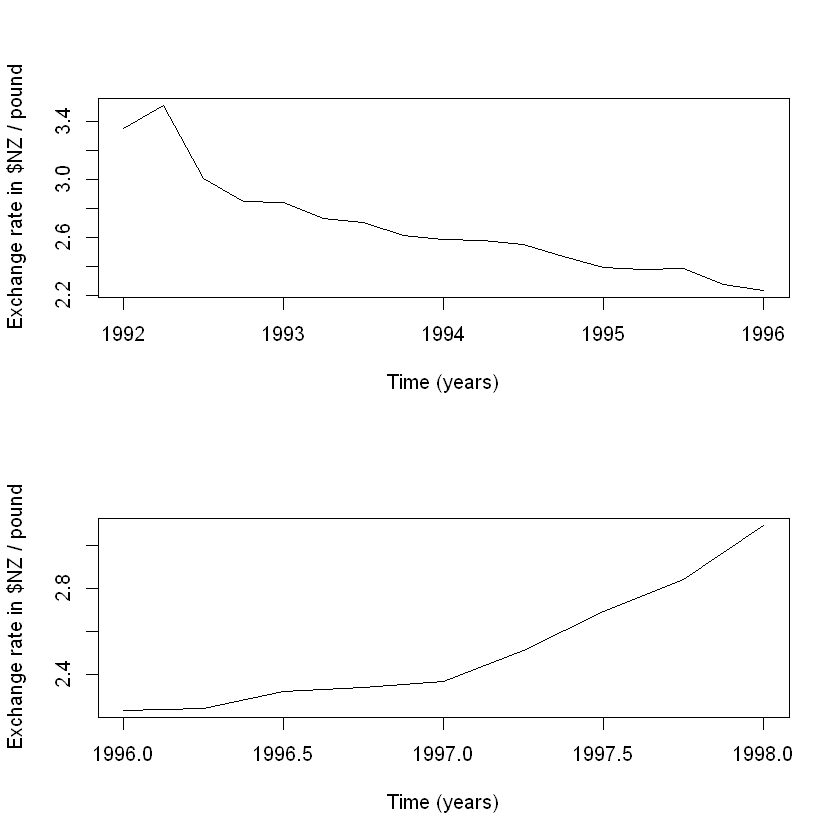

In [32]:
# Plotting the subseries
layout(1:2)
plot(Z.92.96, ylab = "Exchange rate in $NZ / pound",
    xlab = "Time (years)")
plot(Z.96.98, ylab = "Exchange rate in $NZ / pound",
    xlab = "Time (years)")

As we can see, there is an inherent pitfall in making predictions based on stochastic trends: had we made predictions about the future without understanding underlying causes based on the trend from '92 to '96, we would have been in for a nasty surprise (maybe even a costly one!), as evidenced by the upward trend from '96 to '98. In a later chapter we will explore statsical tests we can apply to test for stochastic trends so that we may reduce the the risk of making inappropriate forecasts.

Let's now turn our attention to a time series regarding a critically important, albeit controversial topic: climate change. At the heart of climate change studies (especially those published in 2003 by Jones and Moberg, as well as Rayner et al.) is the temperature seires, expressed as anomolies from monthly means over 1961 to 1990. Let's llok at this dat for ourselves.

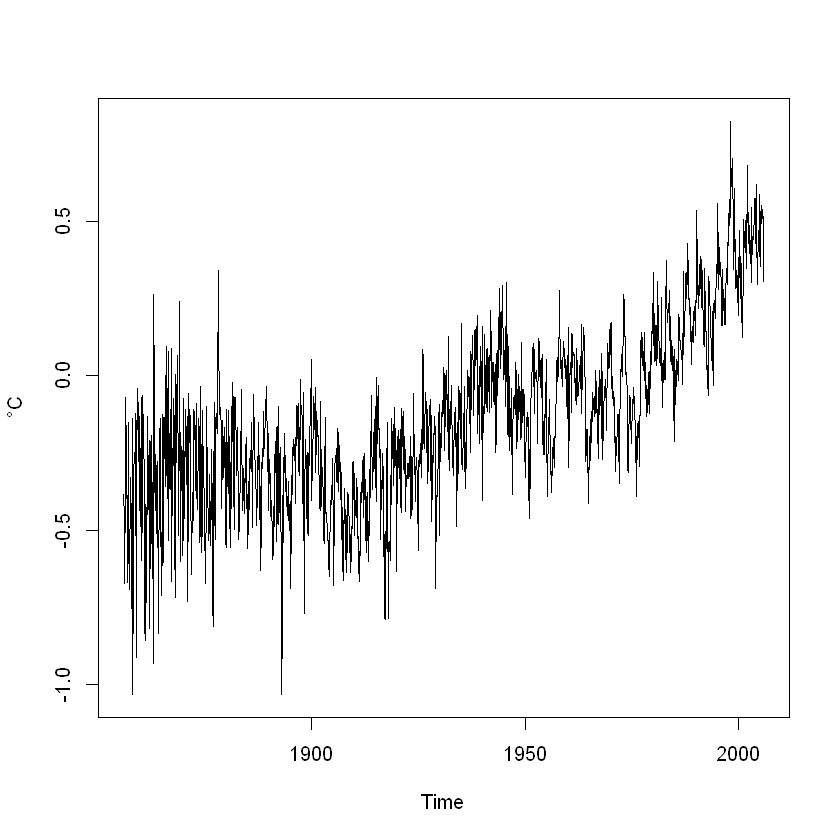

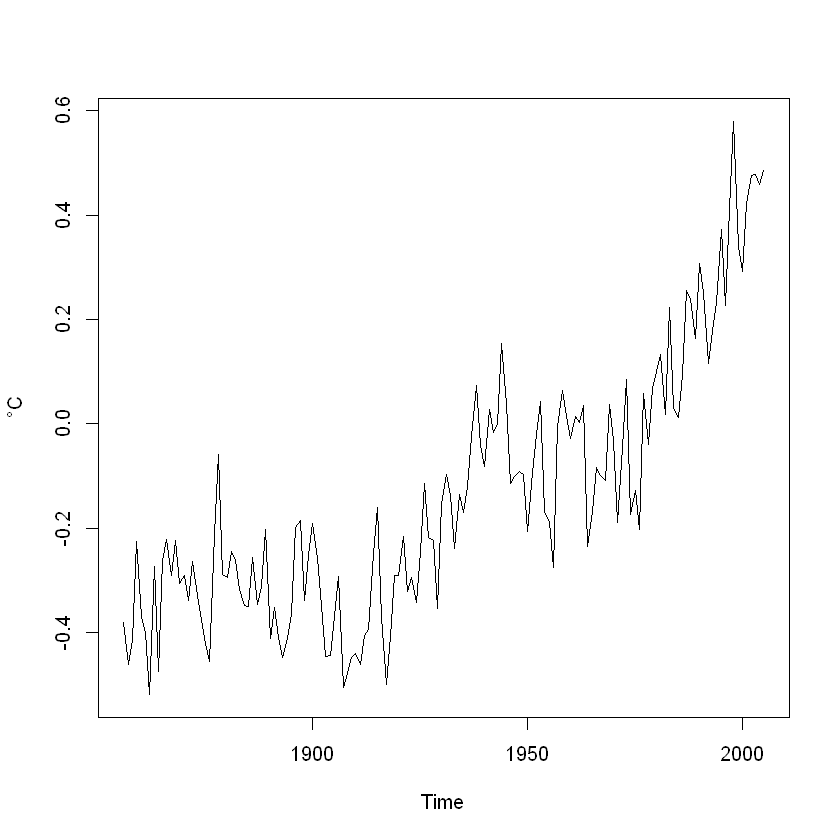

In [33]:
www <- "global.dat"
Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005,12), fr = 12)
Global.annual <- aggregate(Global.ts, FUN = mean)
plot(Global.ts, ylab = "°C")
plot(Global.annual, ylab = "°C")

What is most concerning in this series is the trend, which is why we use the aggregate function to remove the seasonal trends shown in the first plot and create an annual series of mean temperatures. Notice that we avoided having to explicitely divide by 12 by specifying FUN = mean in the aggregate call.

It is the trend from 1970 onwards that gives evidence of global warming. Let's extract that period from 1970 to 2005 using the time function and the associated observed temperature series with the window function, then plot the data with a simple linear regression to *see* the trend of global warming:

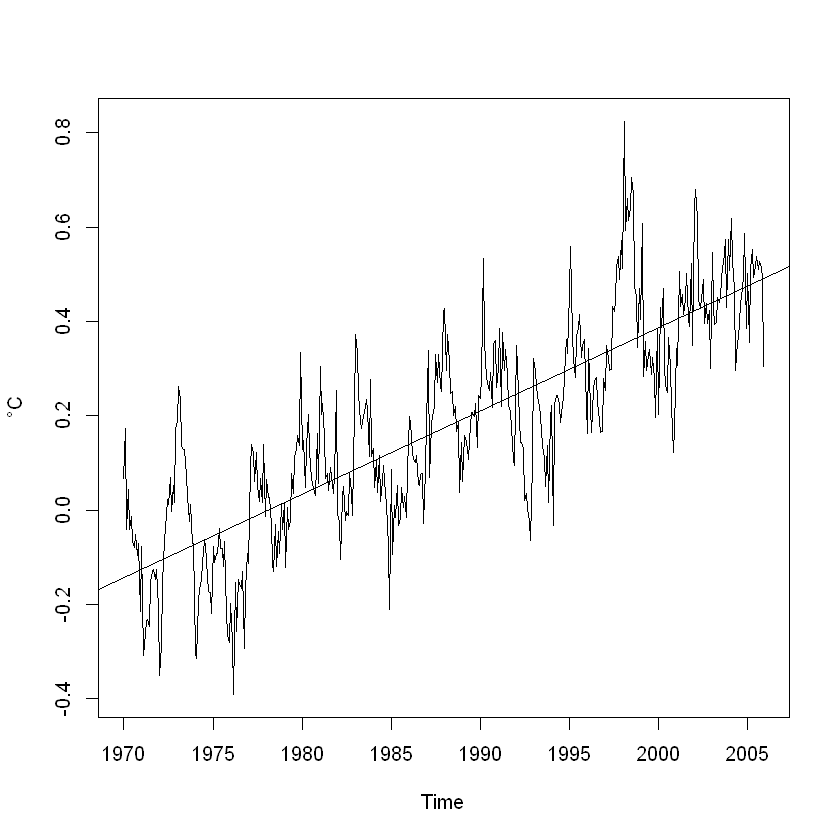

In [34]:
New.series <- window(Global.ts, st = c(1970,1), end = c(2005,12))
New.time <- time(New.series)
plot(New.series, ylab = "°C")
abline(reg=lm(New.series ~ New.time))

We did discuss, previously, the pitfall of innaproppriate extrapolation, and it is true that the question around the concern of climate change studies is whether or not the rising sea level are attributed to human activity throug burning fossil fuels and greenhouse gas emissions, or just a natural trend over the course of a longer cycle, that may see a downward trend. There must be some physical explanation for this, otherwise we run into the problem from before where we saw two unrelated time series strongly correlated if they both have a trend. With climate change, however, there is a global consensus among scientists that this trend is related to greenhouse gas emissions, and it seems reasonable to acknowledge a causal relationship and expect a continued, dangerous rise in global temperatures if left unchecked.

A note on decompositions of time series data in R: we can use the decompose() function to explore the decomposition of a time series:

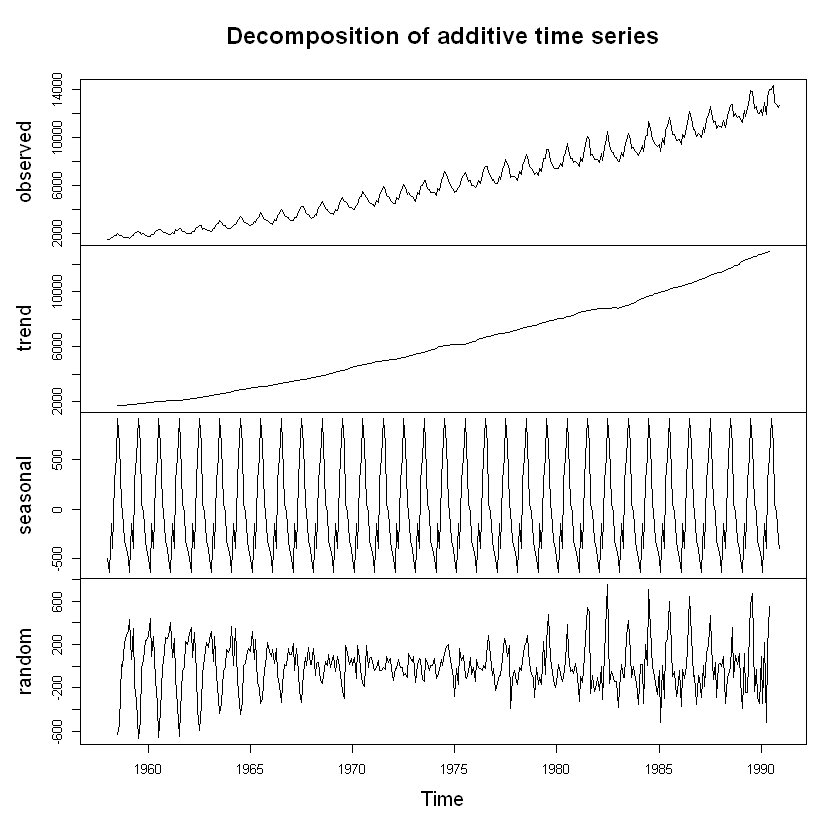

In [35]:
plot(decompose(Elec.ts))

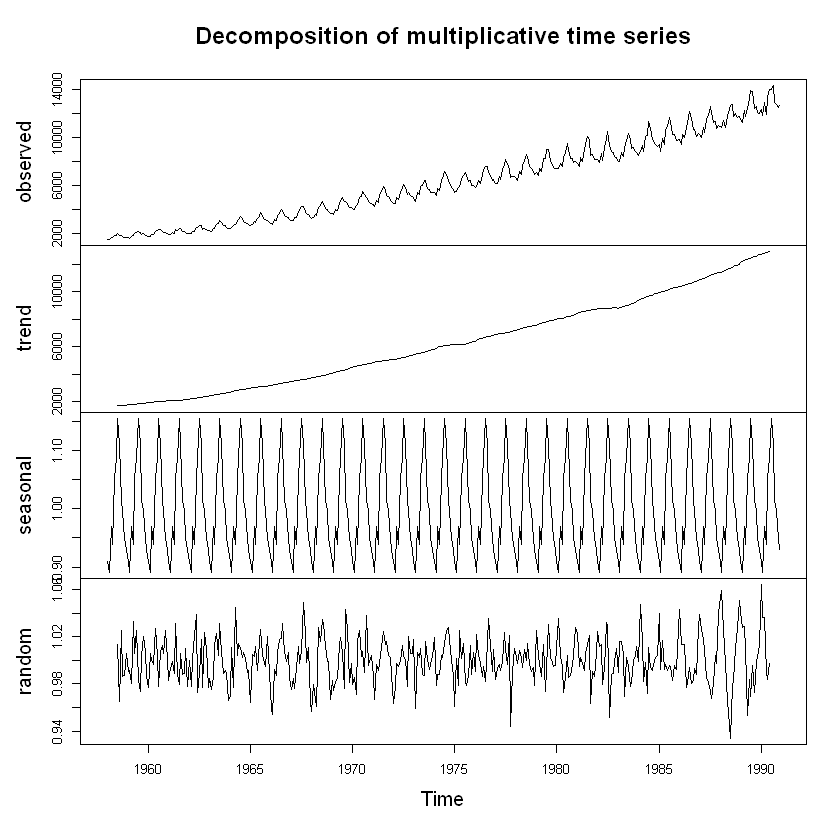

In [36]:
Elec.decom <- decompose(Elec.ts, type = "mult")
plot(Elec.decom)

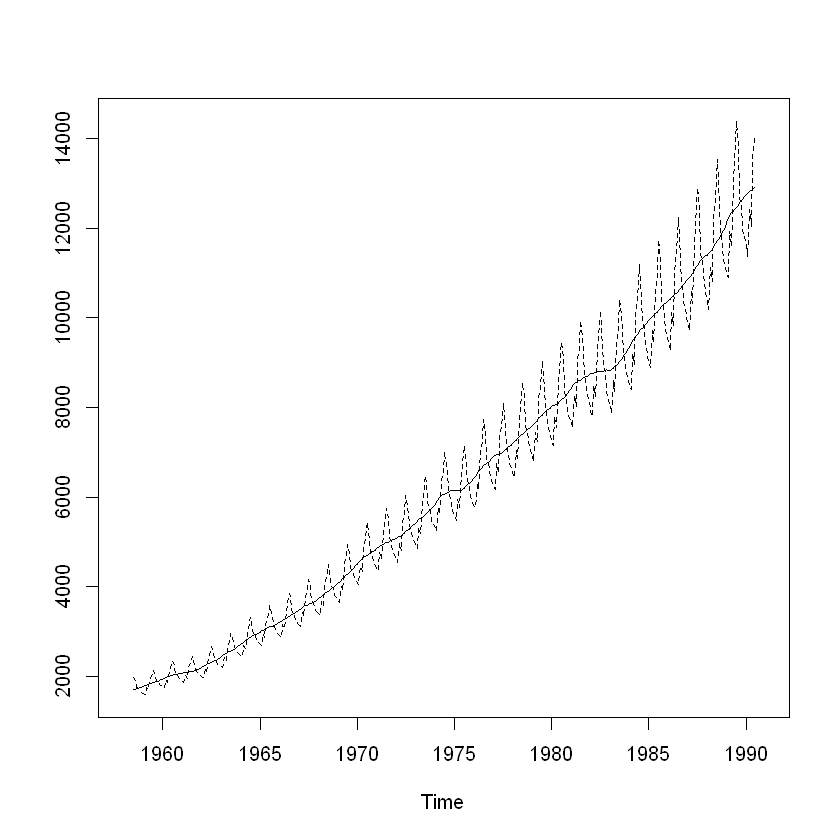

In [37]:
Trend <- Elec.decom$trend
Seasonal <- Elec.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)

The appropriate model is the multiplicative, in this case, due to the variance of the original series and trend increasing with time, but the random component (z<sub>t</sub>) has increasing trend, meaning that a log-transformation may be more appropriate. The random series is gotten from the decompose function and is actually an estimate of the realization of a random process because it is obtained from the original time series using estimates of both the trend and seasonal effects. This is a *residual error series*, but we treat it like a realization of the random process.

## Exercises:

### 1. Exploratory time series analysis:
- Produce a time plot for chocolate and beer. Plot the aggregated time series and a boxplot that summarizes the observed values for each season.

- Decompose the series into the components trend, seasonal effects, and residuals and plot the decomposed series. Produce a plot of the trend with a superimposed seasonal effect.

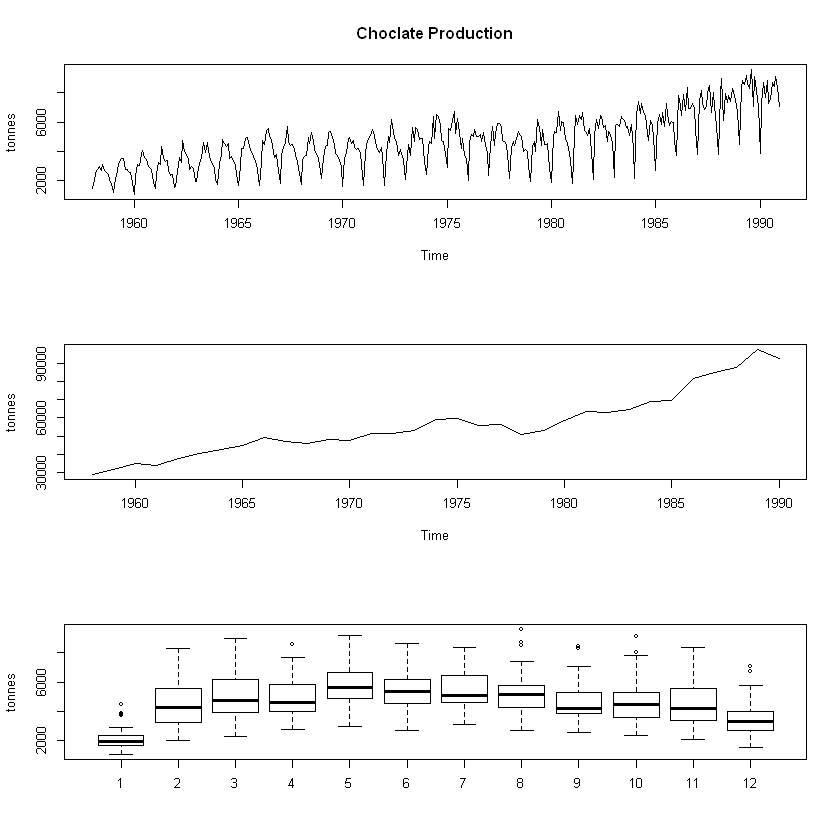

In [49]:
layout(1:3)
plot(Choc.ts, ylab = "tonnes", main = "Choclate Production")  # time plot
plot(aggregate(Choc.ts), ylab = "tonnes")  # aggregated time series
boxplot(Choc.ts ~ cycle(Choc.ts), ylab = "tonnes")  # summarize values of each season with boxplot, use cycle function to extract the seasons from each item of data

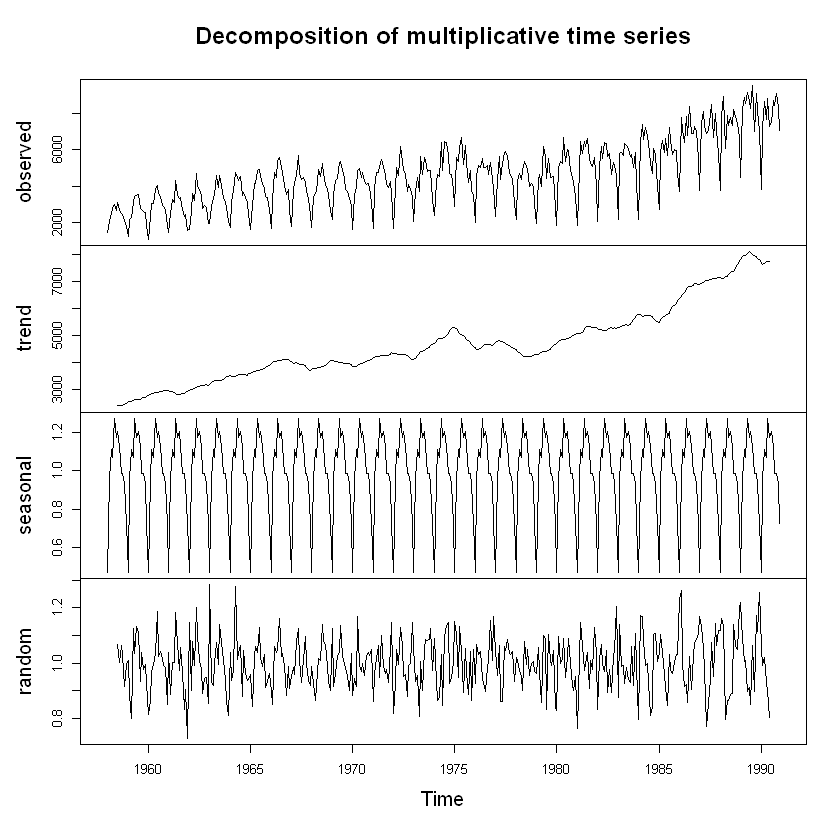

In [51]:
Choc.decom <- decompose(Choc.ts, type = "mult")
plot(Choc.decom)

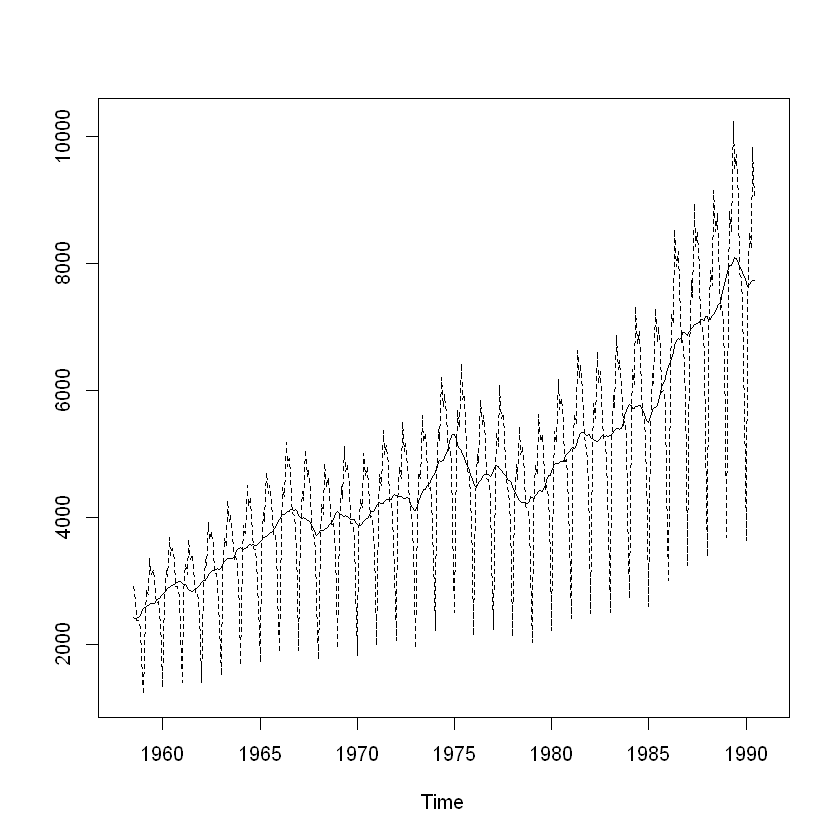

In [52]:
Trend <- Choc.decom$trend
Seasonal <- Choc.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)

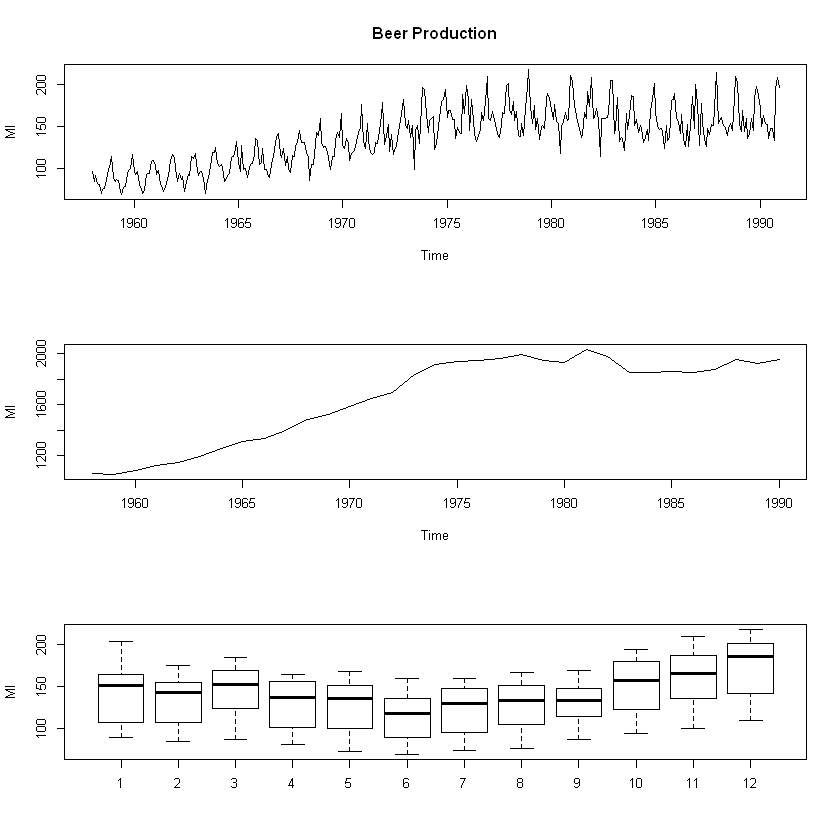

In [48]:
layout(1:3)
plot(Beer.ts, ylab = "Ml", main = "Beer Production")  # time plot
plot(aggregate(Beer.ts), ylab = "Ml")  # aggregated time series
boxplot(Beer.ts ~ cycle(Beer.ts), ylab = "Ml")  # summarize values of each season with boxplot, use cycle function to extract the seasons from each item of data

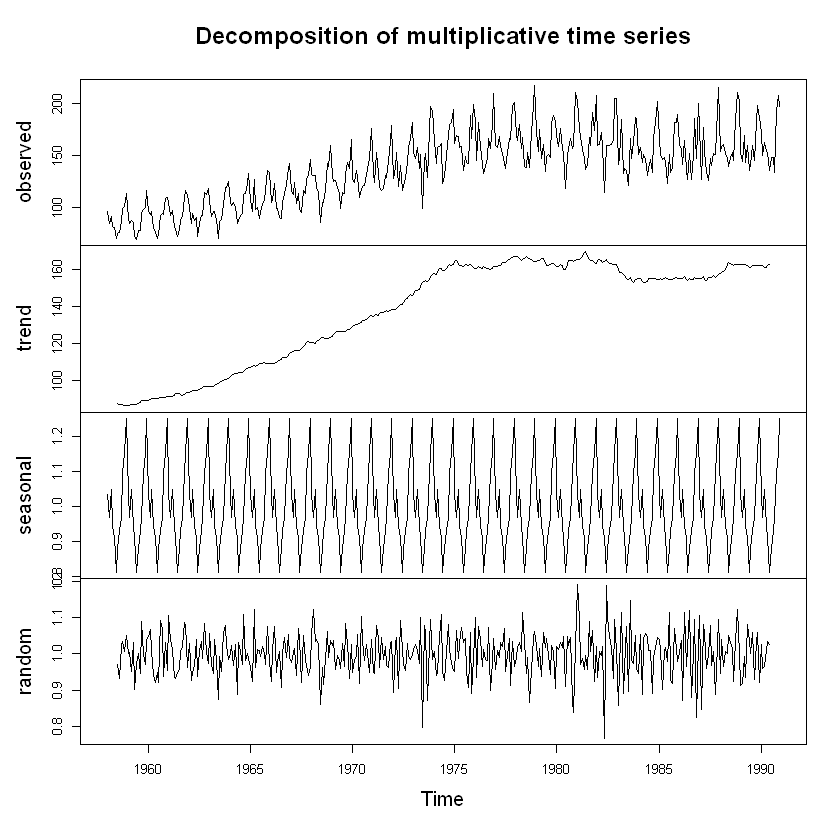

In [53]:
Beer.decom <- decompose(Beer.ts, type = "mult")
plot(Beer.decom)

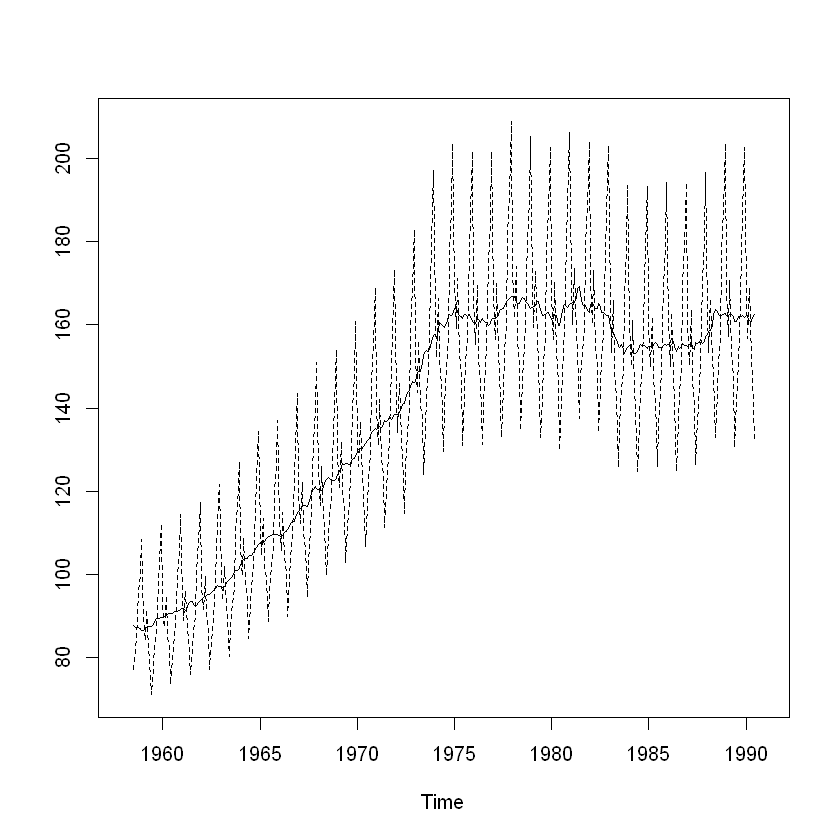

In [54]:
Trend <- Beer.decom$trend
Seasonal <- Beer.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)

### 2. Calculate the Laspeyre price index of the below data.

In [82]:
qi0 <- c(0.33, 2000, 40, 3, 2)
pi0 <- c(18000, 0.8, 40, 80, 200)
qit <- c(0.5, 1500, 20, 2, 1)
pit <- c(20000, 1.6, 60, 120, 360)

In [83]:
LIt <- sum(qi0 * pit)/sum(qi0 * pi0)
LIt

[1] 1.357873

### 3. Calculate the Paasche price index of the below data.

In [84]:
PIt <- sum(qit * pit)/sum(qit * pi0)
PIt

[1] 1.25

The Paasche price index is usually lower than the Laspeyre due to people generally moving away from items that have a steep price increase cheaper substitutes, and this index does not consider the base year's quantities).

Also, the Irving-Fisher price index is calculated as the geometric mean of LIt and PIt, and is determined below:

In [85]:
IFPI <- sqrt(LIt * PIt)
IFPI

[1] 1.302821

### End of Chapter 1.